<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/004_autoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

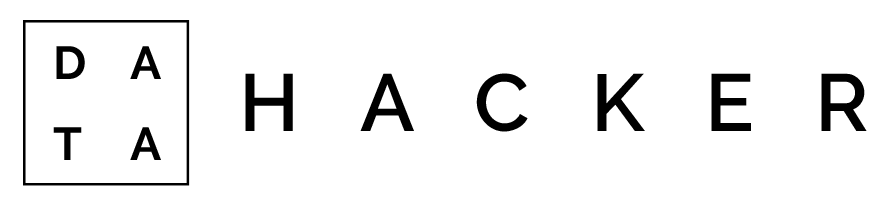
# Computation graphs and Autograd in PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Simple example with gradients

Let's now see a simple example of how the derivative is calculated. We will create a scalar tensor `x` and set the `requires_grad` parameter to `True`.

In [ ]:
x = torch.tensor(3., requires_grad=True)

We will calculate `y` the following way:\
$ y = 3x^2 + 4x + 2$

Now let's see what we get when we replace the `x` with our value `3`:  
$ y = 3(3)^2 + 4(3) + 2 $\
$ y = 3*9 + 12 + 2$\
$ y = 27 + 12 + 2 $\
$ y = 41 $
\
Now comes the part were we take the derivative of `y` with respect to the variable `x`.\
$\frac{dy}{dx} = 2*3x + 4 = 6x + 4$\
If we replace `x` with our value `3`, we get the following:
$6x + 4 = 6(3) + 4 = 18 + 4 = 22$\
So the gradient is equal to $22$\
Let's see how we can do this in code.

In [ ]:
y = 3*x**2 + 4*x + 2

In [ ]:
print(y)

In [ ]:
y = x+3
z = y**2 + 2
z.backward()

dz / dx

In [ ]:
x = torch.tensor(3, requ... = )
y = torch.tensor(3, requ... = )
z = x * y

z.backward()

Call `y.backward()` to calculate the derivative for that function.

In [ ]:
y.backward()

In [ ]:
x.grad

## Is there a way to turn off the gradient calculation ?

The answer is yes, you can turn the gradient calculation anytime.

In [ ]:
x = torch.tensor(1., requires_grad=True)

In [ ]:
x = x.requires_grad_(False)
print(x_nograd)

In [ ]:
x = x.detach()
print(x_nograd)

# Gradient accumulation

The auto gradient calculation does not reset the gradients automatically, therefore we have to reset them after each optimization. If we forget this step they could end up just accumulating.\
This sounds complex, but it is not, it's easy. To reset the gradients for a particular tensor, you can simply pass `x.grad.zero_()` and it will reset the gradient. 

In [ ]:
x = torch.tensor(3., requires_grad=True)

for epoch in range(3):
  y = 3*x**2 + 4*x + 2
  y.backward()

  print(x.grad)
  # x.grad.zero_()

## Optimizing parameters with autograd 

Create `x` and `y` data and transform them to be torch tensors using the function `torch.from_numpy()`.

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = 2 * x

x_torch = torch.from_numpy(x)
y_torch = torch.from_numpy(y)

Create a list for `w` and `b` in which we will save those values.

In [ ]:
w_ = torch.tensor(5., requires_grad=True)
b_ = torch.tensor(1., requires_grad=True)

We will iterate and calculate the gradients for each value from the tensor `x_torch`. If we want to calculate the gradient for each number instead of the whole batch or list of numbers, we need to set the `w` and `b` parameters to the same number after calculation. After this step we do the forward pass for that number, and then we calculate the loss for that number and do the backpropagation. Update the `w` and `b` parameters and save them in the list we initialized earlier.

In [ ]:
for i_value in range(len(y_torch)):
  w = torch.tensor(5., requires_grad=True)
  b = torch.tensor(1., requires_grad=True)

  y_hat = w * x_torch[i_value] + b
  
  error = y_hat - y_torch[i_value]
  loss = error ** 2 

  loss.backward()
  alpha = 0.01
  with torch.no_grad():
    w_.data -= alpha * w.grad
    b_.data -= alpha * b.grad

To get the final gradient we need to sum all of the gradients for all the numbers and divide them with the total number of values.

In [ ]:
print(w_)
print(b_)

Let's now see how we can do the same thing but just with the whole set of numbers.

In [ ]:
x_torch = torch.from_numpy(x)
y_torch = torch.from_numpy(y)

w_grad = []
b_grad = []

w = torch.tensor(5., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

y_hat = w * x_torch + b

error = y_hat - y_torch
loss = error ** 2 
loss = loss.mean()

loss.backward()
alpha = 0.01

with torch.no_grad():
  w.data -= alpha * w.grad
  b.data -=alpha * b.grad

In [ ]:
print(w)
print(b)